In [1]:
% matplotlib inline
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

# Setup

In [2]:
# Directory paths
datadir = '/projects/f_mc1689_1/LatentFC/data'
behavdir = '%s/hcpbehavior' % (datadir)
subj_group = 'overall'

In [3]:
# Load list of subjects included in the fMRI analysis
fmri_subjs_f = '%s/hcpPostProcCiric/%s_subjects.npy' % (datadir, subj_group)
fmri_subjs = np.load(fmri_subjs_f)
fmri_subjs = list(np.array(fmri_subjs, dtype=int))
fmri_subjs.remove(393247)#remove subject with missing data
len(fmri_subjs)

351

In [4]:
# Load behavioral data
df_f = '%s/hcp_unrestricted_behavior.csv' % (behavdir)
df = pd.read_csv(df_f, index_col=0)
df.shape

(1206, 581)

In [5]:
# Extract data only for subjects in the fMRI analysis
df_fmri_subjs = df.loc[fmri_subjs]
df_fmri_subjs.head()

,Release,Acquisition,Gender,Age,3T_Full_MR_Compl,T1_Count,T2_Count,3T_RS-fMRI_Count,3T_RS-fMRI_PctCompl,3T_Full_Task_fMRI,...,Noise_Comp,Odor_Unadj,Odor_AgeAdj,PainIntens_RawScore,PainInterf_Tscore,Taste_Unadj,Taste_AgeAdj,Mars_Log_Score,Mars_Errs,Mars_Final
Subject,,,,,,,,,,,,,,,,,,,,,
100206,S900,Q11,M,26-30,True,1,1,4,100.0,True,...,6.0,108.79,97.19,1.0,49.7,72.63,72.03,1.84,0.0,1.84
100408,Q3,Q03,M,31-35,True,1,1,4,100.0,True,...,2.0,108.79,98.04,2.0,52.6,114.01,113.59,1.76,2.0,1.68
101006,S500,Q06,F,31-35,True,2,2,4,100.0,True,...,6.0,122.25,111.41,0.0,38.6,123.80,123.31,1.80,0.0,1.80
102311,S500,Q06,F,26-30,True,1,1,4,100.0,True,...,4.4,122.25,110.45,1.0,52.2,98.31,99.06,1.80,0.0,1.80
102513,S900,Q10,M,26-30,True,2,2,4,100.0,True,...,5.2,108.79,98.04,2.0,54.3,84.07,82.37,1.92,0.0,1.92


In [6]:
# Load spreadsheet with descriptions of each of the columns reflecting a cognitive task
# in the HCP behavioral spreadsheet
info_df_f = '%s/results/HPC_Data_Behavior_info.xlsx' % (behavdir)
info_df = pd.read_excel(info_df_f, index_col=0)

In [7]:
# Get a "mask", where the value of each row is True if FA_inclusion is "Yes" and False if "No"
df_cols_mask = info_df['FA_inclusion'] == 'Yes'
# Use the "mask" to select only the Column_header values where FA_inclusion is "True"
df_cols = list(info_df['Column_header'][df_cols_mask].values)

In [8]:
# Make a new spreadsheet with only the columns of interest
fa_df = df_fmri_subjs[df_cols]

In [9]:
tmp = 1 / fa_df['IWRD_RTC'].values
fa_df['IWRD_RTC'] = tmp

/home/karnemann/anaconda3/envs/r-env/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [10]:
# Perform pairwise correlations of the spreadsheet, resulting in correlations of
#each task with each other task
fa_df.corr()

,PicSeq_Unadj,CardSort_Unadj,Flanker_Unadj,PMAT24_A_CR,ReadEng_Unadj,PicVocab_Unadj,ProcSpeed_Unadj,VSPLOT_TC,IWRD_TOT,IWRD_RTC,ListSort_Unadj
PicSeq_Unadj,1.000000,0.135318,0.062667,0.294872,0.166733,0.143083,0.210558,0.180994,0.201249,0.171290,0.363765
CardSort_Unadj,0.135318,1.000000,0.525642,0.200100,0.199863,0.124656,0.292065,0.206310,0.102116,0.134807,0.106358
Flanker_Unadj,0.062667,0.525642,1.000000,0.098268,0.110804,0.147849,0.303807,0.160794,0.049249,0.135527,0.098549
PMAT24_A_CR,0.294872,0.200100,0.098268,1.000000,0.430549,0.431842,0.095481,0.383378,0.169786,0.078945,0.331164
ReadEng_Unadj,0.166733,0.199863,0.110804,0.430549,1.000000,0.634472,0.087961,0.367025,0.249911,0.118682,0.295753
PicVocab_Unadj,0.143083,0.124656,0.147849,0.431842,0.634472,1.000000,0.075910,0.302511,0.299405,0.201665,0.344163
ProcSpeed_Unadj,0.210558,0.292065,0.303807,0.095481,0.087961,0.075910,1.000000,0.072992,0.153496,0.275457,0.071203
VSPLOT_TC,0.180994,0.206310,0.160794,0.383378,0.367025,0.302511,0.072992,1.000000,0.038912,0.050961,0.291110
IWRD_TOT,0.201249,0.102116,0.049249,0.169786,0.249911,0.299405,0.153496,0.038912,1.000000,0.373554,0.154888
IWRD_RTC,0.171290,0.134807,0.135527,0.078945,0.118682,0.201665,0.275457,0.050961,0.373554,1.000000,0.093497


Text(0,0.5,'Task number')

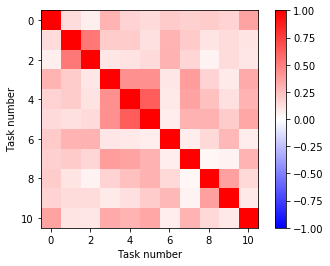

In [11]:
# Visualize the correlations between the tasks
#This matrix is used for Factor Analysis
plt.imshow(fa_df.corr().values, interpolation='nearest', cmap='bwr')
# Sets the range of values when plotting colors to -1 to 1
plt.clim(-1,1)
# Show the color legend
plt.colorbar()
plt.xlabel('Task number')
plt.ylabel('Task number')
#plt.savefig('/home/csg397/Documents/figures/correlation.png', dpi=300, transparent=True)

# Run factor analysis

In [15]:
%load_ext rpy2.ipython
import warnings
warnings.filterwarnings('ignore')

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


In [16]:
%%R 
#install.packages("psych", repos='http://cran.us.r-project.org', quiet=TRUE)
library(psych)
library(nFactors)

In [17]:
fa_input_dat = fa_df.values

In [18]:
fa_input_mat = fa_df.corr().values

In [19]:
n_subjs = len(fmri_subjs)
print n_subjs

351


In [20]:
%%R -i fa_input_dat -i n_subjs -o fa_output -o scores -o loads
fa_output <- fa(fa_input_dat, nfactors=1, covar=FALSE, fm="minres", n.obs=n_subjs, rotate="oblimin", scores='regression')
loads <- fa_output$loadings
scores <-fa_output$scores
fa_output


Factor Analysis using method =  minres
Call: fa(r = fa_input_dat, nfactors = 1, n.obs = n_subjs, rotate = "oblimin", 
    scores = "regression", covar = FALSE, fm = "minres")
Standardized loadings (pattern matrix) based upon correlation matrix
    MR1    h2   u2 com
1  0.40 0.157 0.84   1
2  0.38 0.141 0.86   1
3  0.31 0.095 0.90   1
4  0.61 0.369 0.63   1
5  0.67 0.449 0.55   1
6  0.67 0.454 0.55   1
7  0.28 0.079 0.92   1
8  0.49 0.236 0.76   1
9  0.37 0.137 0.86   1
10 0.30 0.090 0.91   1
11 0.50 0.245 0.75   1

                MR1
SS loadings    2.45
Proportion Var 0.22

Mean item complexity =  1
Test of the hypothesis that 1 factor is sufficient.

The degrees of freedom for the null model are  55  and the objective function was  2.35 FALSE with Chi Square of  810.21
The degrees of freedom for the model are 44  and the objective function was  0.91 
 FALSE
The root mean square of the residuals (RMSR) is  0.11 
The df corrected root mean square of the residuals is  0.12 
 FALSE
The h

~~~
%%R -i fa_input_dat -i n_subjs -o fa_output -o scores -o loads -o test
fa_output <- fa(fa_input_dat, nfactors=2, covar=FALSE, fm="minres", n.obs=176, rotate="oblimin", scores='regression')
#loads <- fa_output$loadings
#scores <-fa_output$scores
fa_output
test <- omega(fa_input_dat,nfactors=3,fm="minres",n.iter=1,p=.05,poly=FALSE,key=NULL,
    flip=TRUE,digits=2, title="Omega",sl=TRUE,labels=NULL,
    plot=TRUE,n.obs=NA,rotate="oblimin",Phi=NULL,option="equal",covar=FALSE)
scores <- test$scores
loads <- test$loadings
test
~~~

In [21]:
load_df = pd.DataFrame(loads.T[0], index=df_cols, columns=['Load'])
load_df.to_excel('%s/results/fa/%s/%s_factor_loadings_nfactors_1.xlsx' % (behavdir, subj_group, subj_group))

In [22]:
load_df

,Load
PicSeq_Unadj,0.396715
CardSort_Unadj,0.375706
Flanker_Unadj,0.308403
PMAT24_A_CR,0.607387
ReadEng_Unadj,0.669821
PicVocab_Unadj,0.673930
ProcSpeed_Unadj,0.280330
VSPLOT_TC,0.485364
IWRD_TOT,0.370019
IWRD_RTC,0.300739


In [23]:
scores_df = pd.DataFrame(scores, index=fmri_subjs, columns=['g'])
scores_df.to_excel('%s/results/fa/%s/%s_factor_scores_nfactors_1.xlsx' % (behavdir, subj_group, subj_group))

2.277380563333654e-16
0.8837408679728593


Text(0,0.5,'# Subjects')

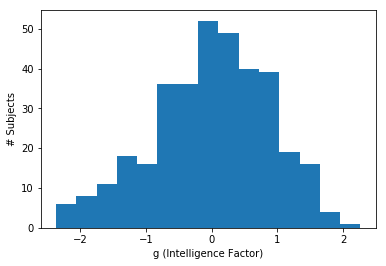

In [24]:
plt.hist(scores_df['g'].dropna(), bins=15);
print np.nanmean(scores_df['g'])
print np.nanstd(scores_df['g'])
plt.xlabel('g (Intelligence Factor)')
plt.ylabel('# Subjects')